In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train_data = 'C:\\Users\\Lakshmi Praffulla\\Desktop\\MLBA_Kaggle\\train.csv'
test_data = "C:\\Users\\Lakshmi Praffulla\\Desktop\\MLBA_Kaggle\\valid.csv"

In [3]:
def getData(path):
#     sequence = []
#     label_str = []
    label = []
    
    with open(train_data) as f:
        sequence = []
        label_str = []
        for line in f:
            text_file = line.split(",");
            if text_file[0] == 'ID':
                continue;
            label_str.append(text_file[1])
            s = text_file[2]
            sequence.append(s[:-1]);
    
    for i in label_str:
        if i == 'DNA':
            label.append(1)
        else:
            label.append(0)
    
    return sequence,label

In [4]:
x_train,y_train = getData(train_data);

In [5]:
len(x_train)

3049

In [6]:
aminoacid_sequence = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

dipeptide_seq = []

for charone in aminoacid_sequence:
    for chartwo in aminoacid_sequence:
        char_to_add = charone+chartwo
        char_to_addback = chartwo + charone    
        dipeptide_seq.append(char_to_add)
        if char_to_add == char_to_addback:
            continue
        dipeptide_seq.append(char_to_addback)

In [7]:
len(dipeptide_seq)

780

In [8]:
def get_dipeptite_dictionary(str):
    
    size = len(str)
    
    i = 0
    eachseq_list = []
    while( i < size - 1 ):
        add_seq = str[i] + str[i+1]
        eachseq_list.append(add_seq)
        i += 1
    
    i = 0
    while( i < size - 2 ):
        add_seq = str[i] + str[i+2]
        eachseq_list.append(add_seq)
        i += 1 
        
    
    getdict = {}
    
    for item in eachseq_list:
        if getdict.get(item) == None:
            getdict[item] = 1
        else:
            temp = getdict[item]
            temp += 1
            getdict[item] = temp
    
    new_dict = {}
    for item in getdict:
        value = getdict[item]
        value = value/(len(str))
        new_dict[item] = value
    
    return new_dict

In [9]:
def getlist_of_dictionary(x_train):
    list_dictionary = []
    
    for each in x_train:
        dic = get_dipeptite_dictionary(each)
        list_dictionary.append(dic)
        
    return list_dictionary

In [10]:
def getvector(vector_dictionary):
    final_vector = []
    
    for dic in vector_dictionary:
        vec = [0.0] * 780
        for item in dic:
            for seq in dipeptide_seq:
                if seq == item:
                    index = dipeptide_seq.index(seq)
                    vec[index] = dic[item]
                    
        final_vector.append(vec)            
    
    return final_vector

In [11]:
training_vector_dict = getlist_of_dictionary(x_train)

In [1]:
training_vector_dict

In [12]:
X_Train = getvector(training_vector_dict)

In [13]:
# X_Train

In [14]:
len(X_Train)

3049

In [15]:
len(y_train)

3049

In [16]:
x = np.array(X_Train)
y = np.array(y_train)

In [17]:
x.shape

(3049, 780)

In [18]:
y.shape

(3049,)

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=42)

Test Data

In [20]:
ID = []
test_sequence = []

with open(test_data) as f:
    for line in f:
        after_split = line.split(",")
        if after_split[0] == 'ID':
            continue;
        ID.append(after_split[0])
        test_sequence.append(after_split[1][:-1])

In [21]:
len(ID)

1071

In [22]:
testing_vector_dict = getlist_of_dictionary(test_sequence)

In [23]:
x_test = getvector(testing_vector_dict)

In [24]:
x_test = np.array(x_test)

In [25]:
x_test.shape

(1071, 780)

SVM

In [50]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
svm_model = Pipeline([('clf', SVC())])
param_C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
param_scoring = ["accuracy"]
    
param = [{'clf__C': param_C,'clf__kernel': ['linear','rbf']}]
grid = GridSearchCV(estimator=svm_model,param_grid=param,refit = 'accuracy',scoring=param_scoring,verbose = 100,cv=10,n_jobs=-1)
grid = grid.fit(x_train,y_train)

In [53]:
print(" The Accuracy of the best model is : ",grid.best_score_)
print(" Best Parameters : ",grid.best_params_)

 The Accuracy of the best model is :  0.6982193064667291
 Best Parameters :  {'clf__C': 10.0, 'clf__kernel': 'linear'}


In [54]:
classifier = grid.best_estimator_
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_val)

In [56]:
print("Accuracy on test data using SVM :",classifier.score(x_val, y_val)*100)

Accuracy on test data using SVM : 67.65027322404372


In [57]:
ans_SVM = classifier.predict(x_test)

In [71]:
ans_SVM  

array([0, 0, 0, ..., 0, 0, 1])

In [88]:
f = open('svm_dipep800_67val.csv','w')

In [89]:
s = "ID,Lable\n"

In [90]:
c = 0
for i in ans_SVM:
    j = -1
    if i == 1:
        s = s+ID[c]+","+i.__str__()+"\n"
    else:
        s = s+ID[c]+","+j.__str__()+"\n"
    c = c + 1

In [91]:
f.write(s)

8297

In [92]:
f.close()

KNN

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [34]:
import numpy as np
params_KNN = {'n_neighbors': [1,2,3,4], 
              'p': [1,2]}

In [35]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=100,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [3]:
gs_KNN.fit(x_train, y_train);

In [38]:
gs_KNN.best_params_

{'n_neighbors': 4, 'p': 1}

In [39]:
gs_KNN.best_score_

0.6711965010934083

In [40]:
accuracy_score(y_val,gs_KNN.predict(x_val))

0.6841530054644809

In [42]:
ans_KNN = gs_KNN.predict(x_test)

In [43]:
f = open('KNN_dipep800_68val.csv','w')
s = "ID,Lable\n"
c = 0

for i in ans_KNN:
    j = -1
    if i == 1:
        s = s+ID[c]+","+i.__str__()+"\n"
    else:
        s = s+ID[c]+","+j.__str__()+"\n"
    c = c + 1

f.write(s)
f.close()

Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=100, 
                     scoring='accuracy')

In [4]:
gs_NB.fit(x_train, y_train);

In [41]:
gs_NB.best_params_

In [106]:
gs_NB.best_score_

0.6904092471102781

In [107]:
accuracy_score(y_val,gs_NB.predict(x_val))

0.6830601092896175

In [108]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

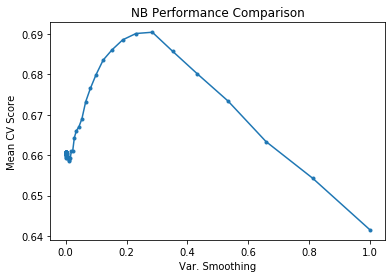

In [109]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [113]:
ans_NB= gs_NB.predict(x_test)

In [114]:
f = open('NB_dipep800_68val.csv','w')

s = "ID,Lable\n"
c = 0

for i in ans_NB:
    j = -1
    if i == 1:
        s = s+ID[c]+","+i.__str__()+"\n"
    else:
        s = s+ID[c]+","+j.__str__()+"\n"
    c = c + 1

f.write(s)
f.close()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [49]:
rf = RandomForestClassifier()

In [51]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 100)

In [5]:
grid_search.fit(x_train, y_train)

In [53]:
accuracy_score(y_train,grid_search.predict(x_train))

0.9887535145267105

In [54]:
accuracy_score(y_val,grid_search.predict(x_val))

0.6644808743169399

In [55]:
ans_RF = grid_search.predict(x_test)

In [57]:
f = open('RF_dipep800_66val.csv','w')

s = "ID,Lable\n"

c = 0
for i in ans_RF:
    j = -1
    if i == 1:
        s = s+ID[c]+","+i.__str__()+"\n"
    else:
        s = s+ID[c]+","+j.__str__()+"\n"
    c = c + 1

f.write(s)

f.close()

XGBoost

In [27]:
!pip install xgboost

In [28]:
import xgboost as xgb

In [31]:
validationPredictions=[]
trainingPredictions=[]
xgbClassifiersUsed=[]

In [42]:
xgboostClassifier= xgb.XGBClassifier(booster='gbtree',n_estimators=100,max_depth=6)
xgboostClassifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
xgbClassifiersUsed.append(xgboostClassifier)

YBoostTrain = xgboostClassifier.predict(x_train)
YBoostValidate = xgboostClassifier.predict(x_val)

In [44]:
print("\nXGBoost Forest :-")
print("Training Set - AUCCURACY : ",accuracy_score(y_train,YBoostTrain))
print("Validation Set - AUCCURACY : ",accuracy_score(y_val,YBoostValidate))


XGBoost Forest :-
Training Set - AUCCURACY :  1.0
Validation Set - AUCCURACY :  0.726775956284153


In [34]:
ans_XGB = xgboostClassifier.predict(x_test)

In [35]:
f = open('XGB_dipep800_72val.csv','w')

s = "ID,Lable\n"

c = 0
for i in ans_XGB:
    j = -1
    if i == 1:
        s = s+ID[c]+","+i.__str__()+"\n"
    else:
        s = s+ID[c]+","+j.__str__()+"\n"
    c = c + 1

f.write(s)

f.close()

XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [40]:
parameters = {
    'max_depth': [1,2,3,4,5,6,7],
    'n_estimators': [100,200,300,400,500600],
    'learning_rate': [0.1,0.01,0.5]
}

In [41]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=100
)

In [6]:
grid_search.fit(x_train, y_train)

In [36]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
grid_search.best_score_

0.7380506091846298

In [38]:
YBoostTrain = grid_search.predict(x_train)
YBoostValidate = grid_search.predict(x_val)

In [39]:
print("\nXGBoost Forest :-")
print("Training Set - AUCCURACY : ",accuracy_score(y_train,YBoostTrain))
print("Validation Set - AUCCURACY : ",accuracy_score(y_val,YBoostValidate))


XGBoost Forest :-
Training Set - AUCCURACY :  1.0
Validation Set - AUCCURACY :  0.7245901639344262
